<a href="https://colab.research.google.com/github/tderr24/MAT-422-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('diabetes.csv')
df = data[['Glucose','BloodPressure','Insulin','BMI','Outcome']]

X_train, X_test, y_train, y_test = train_test_split(df[['Glucose','BloodPressure','Insulin','BMI']], df['Outcome'], test_size=0.33, random_state=42)

## Logistic regression

In [ ]:
log = LogisticRegression(C=1, solver='liblinear')
log.fit(X_train,y_train)

yhat = log.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7362204724409449


<AxesSubplot:title={'center':'Absolute Value of Logistic Regression Model Coefficients'}>

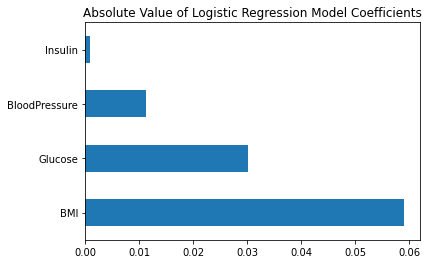

In [ ]:
(pd.Series(abs(log.coef_[0]), index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh',title="Absolute Value of Logistic Regression Model Coefficients"))

## Support vector machine

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7519685039370079


<AxesSubplot:title={'center':'Absolute Value of Support Vector Machine Coefficients'}>

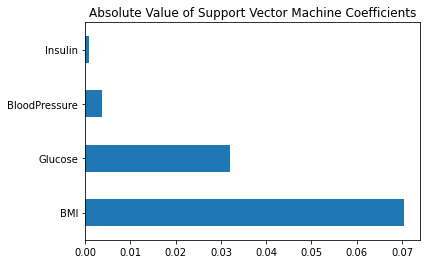

In [ ]:
(pd.Series(abs(clf.coef_[0]), index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh',title="Absolute Value of Support Vector Machine Coefficients"))

## Neural Network

In [ ]:
clf = MLPClassifier(solver='adam',
                    activation='tanh',
                    alpha=1e-5,
                    hidden_layer_sizes=(100,2),
                   learning_rate='adaptive',
                   max_iter=500)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7086614173228346
